<a href="https://colab.research.google.com/github/fajni/DWKD-SPOZ/blob/main/diplomski_rad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model mašinskog učenja - Python

# Importovanje podataka

In [204]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fajni/DWKD-SPOZ/main/Data/MasinskoUcenjeBrojevi.csv') # df - data frame
df # print(df)

,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit
0,3,10,0.10,6,32,5,0.68,1
1,0,0,0.08,96,2,35,0.50,1
2,4,15,0.06,41,3,3,0.36,1
3,1,5,0.00,292,4,49,0.56,1
4,1,5,0.07,101,43,45,0.69,1
...,...,...,...,...,...,...,...,...
11872,0,0,0.06,61,3,30,0.70,1
11873,0,0,0.10,13,18,5,0.59,1
11874,2,7,0.03,163,20,20,0.39,1
11875,0,0,0.06,13,5,5,0.40,1


# Priprema podataka na X i Y

X predstavlja one kolone koje se koriste za dobijanje rezultata, tj. Y,

Y predstavlja konačnu kolonu, onu kolonu čija se vrednost predviđa.

In [223]:
y = df['Profit'].to_numpy()
y

array([1, 1, 1, ..., 1, 1, 1])

In [224]:
x = df.drop('Profit', axis = 1).to_numpy() # axis=1 - oznacava da radi sa kolonama, dok ukoliko je axis=0 - radi sa redovima
#x = pd.get_dummies(df.drop('Profit', axis=1)) # Pretvara OrderPriority (Low, High, Medium, ...) kao One-Hot encoding. Tj. dodaju se nove kolone sa true/false za svaku vrednost.
x

array([[3.0e+00, 1.0e+01, 1.0e-01, ..., 3.2e+01, 5.0e+00, 6.8e-01],
       [0.0e+00, 0.0e+00, 8.0e-02, ..., 2.0e+00, 3.5e+01, 5.0e-01],
       [4.0e+00, 1.5e+01, 6.0e-02, ..., 3.0e+00, 3.0e+00, 3.6e-01],
       ...,
       [2.0e+00, 7.0e+00, 3.0e-02, ..., 2.0e+01, 2.0e+01, 3.9e-01],
       [0.0e+00, 0.0e+00, 6.0e-02, ..., 5.0e+00, 5.0e+00, 4.0e-01],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 1.0e+00, 7.0e+01, 7.4e-01]])

## Razdvajanje podataka na SET TESTIRANJA i SET TRENIRANJA

Set za treniranje ce sluziti kao set za kreiranje modela, a set za testiranje ce sluziti kao nepoznati podaci koji se koriste za testiranje seta za treniranje.

Za ovaj proces je potrebna scikit-learn biblioteka.

In [225]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# test_size = 0.2 - set za testiranje ce biti 20% od ukupnog seta, dok ce ostalo biti set za treniranje

x_train

array([[1.0e+00, 5.0e+00, 1.0e-02, ..., 1.0e+01, 1.0e+00, 5.7e-01],
       [4.0e+00, 1.5e+01, 1.0e-01, ..., 1.4e+01, 5.0e+00, 4.9e-01],
       [2.0e+00, 7.0e+00, 8.0e-02, ..., 3.5e+01, 9.0e+00, 7.6e-01],
       ...,
       [2.0e+00, 7.0e+00, 7.0e-02, ..., 1.0e+00, 6.0e+00, 3.5e-01],
       [1.0e+00, 5.0e+00, 7.0e-02, ..., 2.1e+01, 1.0e+00, 3.7e-01],
       [3.0e+00, 1.0e+01, 1.0e-02, ..., 1.2e+01, 1.0e+00, 4.4e-01]])

In [226]:
x_test

array([[1.0e+00, 5.0e+00, 1.0e-02, ..., 1.5e+01, 6.0e+00, 3.9e-01],
       [2.0e+00, 7.0e+00, 0.0e+00, ..., 5.0e+00, 1.1e+01, 6.1e-01],
       [2.0e+00, 7.0e+00, 4.0e-02, ..., 1.0e+01, 2.0e+01, 5.0e-02],
       ...,
       [2.0e+00, 7.0e+00, 1.0e-01, ..., 2.0e+00, 3.4e+01, 7.3e-01],
       [2.0e+00, 7.0e+00, 2.0e-02, ..., 5.2e+01, 1.0e+00, 3.6e-01],
       [3.0e+00, 1.0e+01, 1.0e-01, ..., 1.2e+01, 5.0e+00, 8.3e-01]])

In [227]:
y_train

array([1, 1, 1, ..., 0, 1, 1])

In [228]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

# Kreiranje modela

## Linearna regresija

scikit-learn bibilioteka poseduje nekoliko funkcija koje se pored kreiranje razlicitih setova podataka, mogu koristiti i za izgradnju modela masinskog ucenja.

### Treniranje modela

In [229]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train) # treniraj prazan model linearne regresije na prosledjenom setu podataka

LinearRegression()

### Primena modela za predviđanje profita

In [230]:
# lr - Linear Regresion Model
# train - Training Set
# pred - Prediction
# Koriscenje modela kako bi se ostvarila predikcija na set treniranja, model se moze koristiti i na set testiranja
# Predikcija nad x set treniranja
y_lr_train_pred = lr.predict(x_train)

y_lr_test_pred = lr.predict(x_test)

for i in range(0, len(y_lr_train_pred), 5):
    print("\t".join(map(str, y_lr_train_pred[i:i+5])))

0.8918285152417729	0.783817546151246	1.0557022584691405	0.9049681456348857	0.7396275171561939
0.7128662768305809	0.995288879471018	0.8447738625273231	0.8613246016692793	0.7757300494994324
0.7554989789959725	0.9798385016228319	0.9657619995536318	0.8496505390179527	0.9223530487991565
0.9045701598991792	0.9214925271426495	0.9856175956844855	1.0804126849636326	1.0449137455511195
0.7175283407596571	0.790646768197784	0.883311851231159	0.9373818246630357	0.7589688188662169
1.1562689394086547	1.0006284843759297	0.7441696236262478	0.7881635856172868	1.176228781942115
1.0365750844706094	0.7856320600443074	0.8664838982846302	0.8513013452650472	0.9333211170837444
0.8376760591053625	0.8459460350009922	0.7090540051418568	0.9395747270451813	1.1467741796478117
0.9430490939321621	1.0596748366488957	0.8736260441879273	0.9805614757671737	0.7197963341887166
1.0043786377615571	1.111258788017305	0.8895518627090292	0.7683238780756683	0.9128992625493395
1.2667522716669408	0.9503782549555317	0.9013012223842382

In [231]:
y_lr_test_pred

array([0.83048059, 0.89235387, 0.70494691, ..., 0.95081575, 0.92196849,
       0.98921928])

### Procenat tacnosti modela (*Procena performansi modela*)

In [232]:
from sklearn.metrics import mean_squared_error, r2_score

# za set treniranja

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

# za set testiranja

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

# y_train
# y_lr_train_pred

In [233]:
lr_test_r2

0.1641591568661913

In [234]:
lr_train_r2

0.13810447125958258

lr_test_r2 (0.16) ≈ lr_train_r2 (0.13)

In [235]:
lr_train_mse

0.08266802952075246

In [236]:
lr_test_mse

0.08337168087496334

lr_train_mse (0.082) ≈ lr_test_mse (0.083)

In [237]:
print('LR MSE (Train): ', lr_train_mse)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.08266802952075246
LR MSE (Test):  0.08337168087496334
LR R2 (Train):  0.13810447125958258
LR R2 (Test):  0.1641591568661913


In [238]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.082668,0.138104,0.083372,0.164159


## Random Forest

### Treniranje modela

In [179]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(x_train, y_train)


RandomForestRegressor(max_depth=2, random_state=100)

### Primena modela za predviđanje profita

In [180]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### Procenat tacnosti modela (Evaluacija)

In [181]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [182]:
rf_results = pd.DataFrame(['Random Forest', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,0.082668,0.138104,0.083372,0.164159


## Upoređivanje modela

In [183]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.082668,0.138104,0.083372,0.164159
1,Random Forest,0.082668,0.138104,0.083372,0.164159


## Vizuelizacija rezultata predikcije

Text(0.5, 0, 'Experimental Profit')

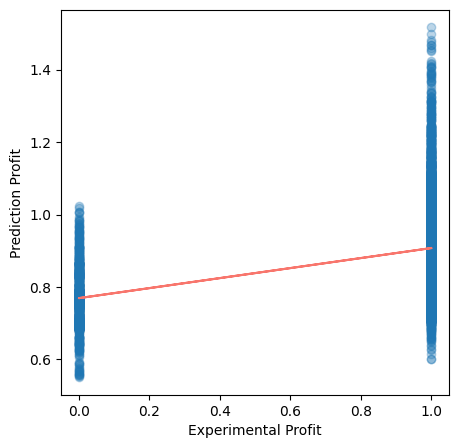

In [156]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Prediction Profit')
plt.xlabel('Experimental Profit')

In [208]:
y

,Profit
0,1
1,1
2,1
3,1
4,1
...,...
11872,1
11873,1
11874,1
11875,1


In [207]:
x

,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin
0,3,10,0.10,6,32,5,0.68
1,0,0,0.08,96,2,35,0.50
2,4,15,0.06,41,3,3,0.36
3,1,5,0.00,292,4,49,0.56
4,1,5,0.07,101,43,45,0.69
...,...,...,...,...,...,...,...
11872,0,0,0.06,61,3,30,0.70
11873,0,0,0.10,13,18,5,0.59
11874,2,7,0.03,163,20,20,0.39
11875,0,0,0.06,13,5,5,0.40


Text(0.5, 0, 'Experimental Profit')

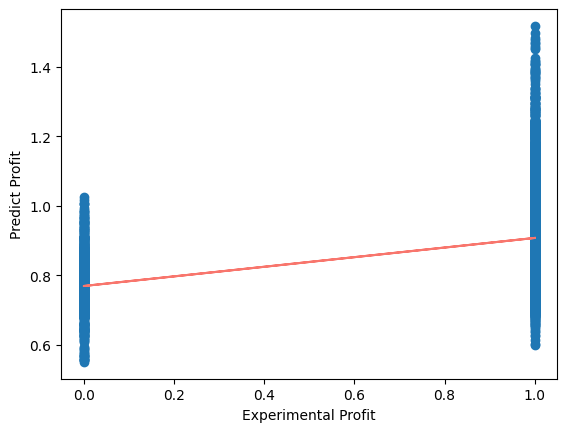

In [243]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x=y_train, y=y_lr_train_pred)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict Profit')
plt.xlabel('Experimental Profit')